In [ ]:
!pip install astronn equinox einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.2/175.2 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 61.0 MB/s eta 0:00:00


In [ ]:
from astroNN.datasets import load_galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion
import numpy as np
import matplotlib.pyplot as plt
import jax

In [ ]:
import torch
import torchvision as tv

In [ ]:
###Peter
import os
import h5py

import torch
import torchvision
from torchvision.transforms import v2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
###Peter
# Just to make the session somewhat determinate
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
set_seed(0)

In [ ]:
###Peter
print(f"CUDA is available: {torch.cuda.is_available()}")

if not torch.cuda.is_available():
    print("If you want, you might want to switch to a GPU-accelerated session!")
    device = torch.device('cpu')
else:
    device = torch.device('cuda')

CUDA is available: False
If you want, you might want to switch to a GPU-accelerated session!


# Galaxy 10 DECals

In [ ]:
# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = load_galaxy10()

Galaxy10_DECals.h5: 100%|█████████▉| 2.73G/2.74G [00:38<00:00, 113MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10_DECals.h5


Galaxy10_DECals.h5: 2.74GB [00:47, 58.1MB/s]                           


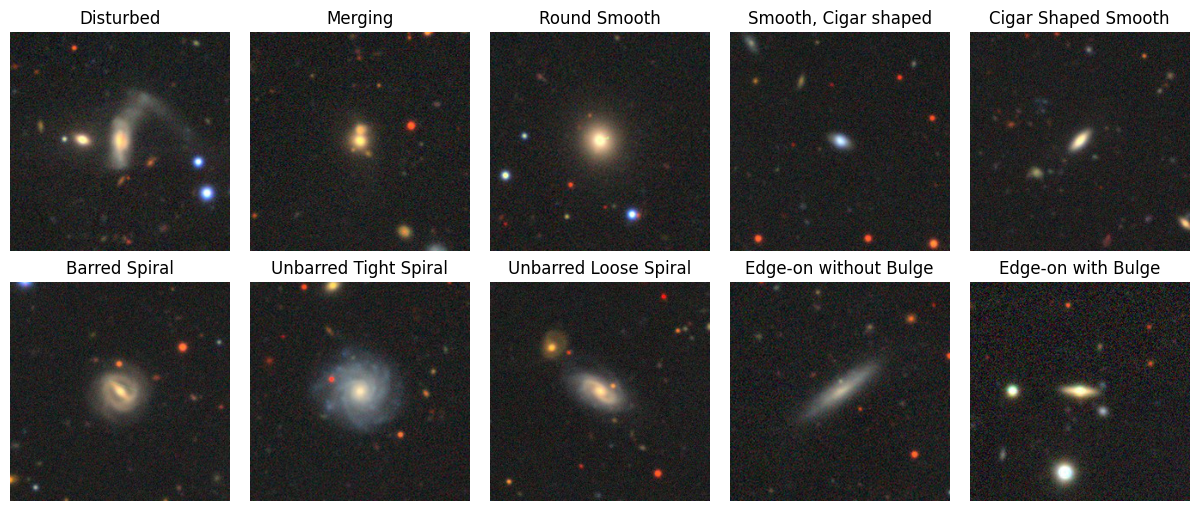

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(12,5), layout='constrained')

for ax, label in zip(np.ravel(axs), range(10)):
    idx = np.where(labels == label)[0][0]
    image = images[idx]

    ax.imshow(image)
    ax.axis('off')
    ax.set_title(galaxy10cls_lookup(label))

#### Remove classes that are not Spiral-like

In [ ]:
remove_labels = range(5)

In [ ]:
labels != 0

array([False, False, False, ...,  True,  True,  True])

In [ ]:
remove_labels = range(5)

for label in remove_labels:
    idx = labels != label
    labels = labels[idx]
    images = images[idx]

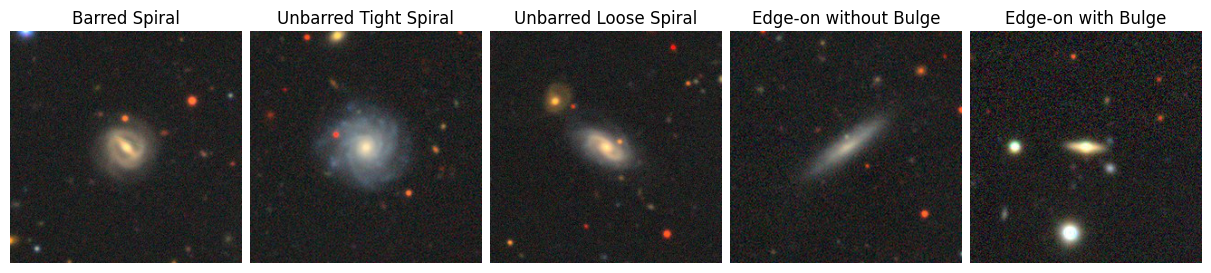

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(12,5), layout='constrained')

for ax, label in zip(np.ravel(axs), range(5,10)):
    idx = np.where(labels == label)[0][0]
    image = images[idx]

    ax.imshow(image)
    ax.axis('off')
    ax.set_title(galaxy10cls_lookup(label))

#### Shift labels to 0-4

In [ ]:
labels = labels - 5

galaxy10cls_lookup_shift = lambda x: galaxy10cls_lookup(x+5)

#### Rescale images

In [ ]:
images.shape

(9796, 256, 256, 3)

In [ ]:
images = jax.vmap(lambda x: x / 255)(images)

# crop the image a bit to get 64x64 shape
def crop_center(images, cropx, cropy):
    _, y, x, _ = images.shape
    startx = x // 2 -(cropx // 2)
    starty = y // 2 -(cropy // 2)
    return images[:, starty:starty+cropy, startx:startx+cropx, :]

images = crop_center(images=images, cropx=64, cropy=64)

In [ ]:
images.shape

(9796, 64, 64, 3)

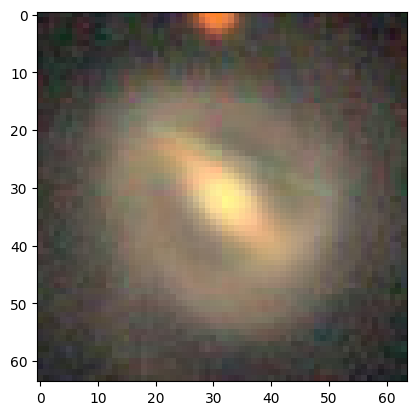

In [ ]:
plt.imshow(images[0])

#### Shuffle images

In [ ]:
rnd_idx = np.random.choice(range(len(images)), replace=False, size=len(images))
images = images[rnd_idx]
labels = labels[rnd_idx]

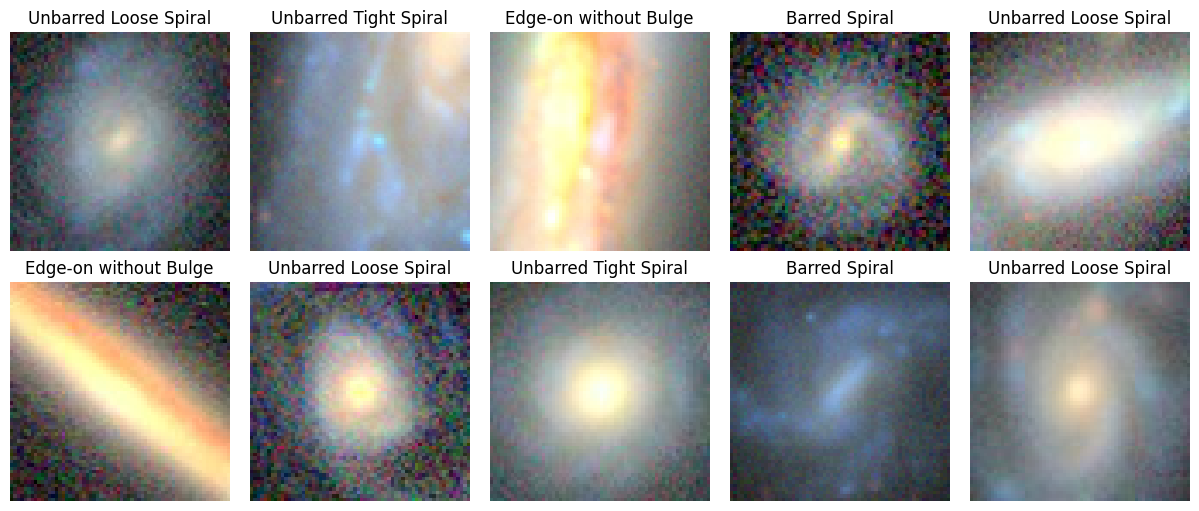

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(12,5), layout='constrained')

for ax, idx in zip(np.ravel(axs), range(10)):
    image = images[idx]
    label = labels[idx]

    ax.imshow(image)
    ax.axis('off')
    ax.set_title(galaxy10cls_lookup_shift(label))

In [ ]:
confusion_matrix = np.zeros((5,5))


# create the confusion matrix
for counter, i in enumerate(labels):
    confusion_matrix[i, labels[counter]] += 1

# Plot the confusion matrix
# galaxy10_confusion(confusion_matrix)

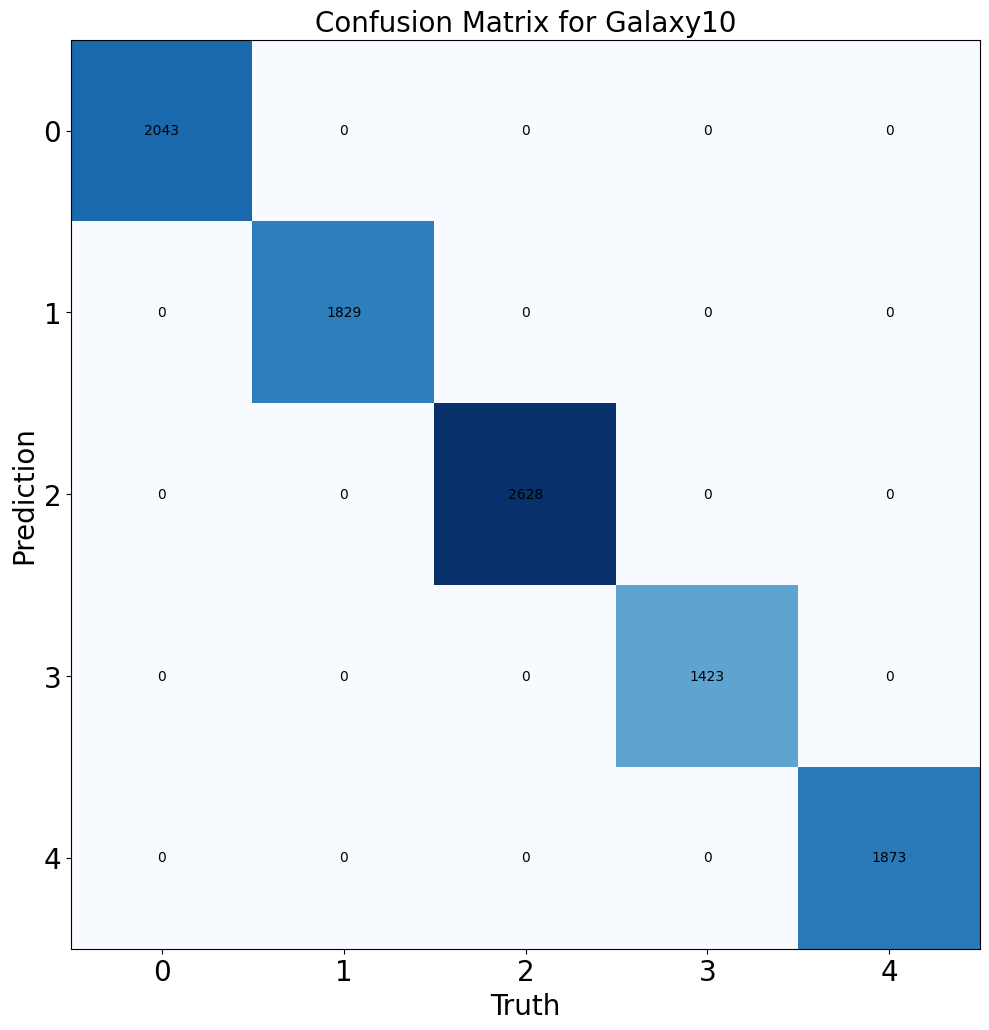

In [ ]:
galaxy10_confusion(confusion_matrix)

# Task: Find the galaxy that looks most similar to Milky Way

<img src="https://d2pn8kiwq2w21t.cloudfront.net/original_images/jpegPIA10748.jpg" width=300>

In [ ]:
#Download the milkyway picture
!wget https://d2pn8kiwq2w21t.cloudfront.net/original_images/jpegPIA10748.jpg

--2024-05-23 13:53:57--  https://d2pn8kiwq2w21t.cloudfront.net/original_images/jpegPIA10748.jpg
Resolving d2pn8kiwq2w21t.cloudfront.net (d2pn8kiwq2w21t.cloudfront.net)... 13.32.192.116, 13.32.192.149, 13.32.192.176, ...
Connecting to d2pn8kiwq2w21t.cloudfront.net (d2pn8kiwq2w21t.cloudfront.net)|13.32.192.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2049707 (2.0M) [image/jpeg]
Saving to: ‘jpegPIA10748.jpg’

jpegPIA10748.jpg    100%[===================>]   1.95M  --.-KB/s    in 0.05s   

2024-05-23 13:53:57 (41.8 MB/s) - ‘jpegPIA10748.jpg’ saved [2049707/2049707]



In [ ]:
#plot the milkyway

In [ ]:
milky_way = tv.io.read_image("./jpegPIA10748.jpg").permute(1,2,0).to(torch.float32)
milky_way = milky_way / 255

In [ ]:
#read in and plot in low resolution

In [ ]:
milky_way = tv.io.read_image("./jpegPIA10748.jpg")
milky_way = tv.transforms.Resize(size=64)(milky_way)
milky_way = milky_way.permute(1,2,0).to(torch.float32)
milky_way = milky_way / 255

In [ ]:
type(milky_way), type(image[0])

(torch.Tensor, jaxlib.xla_extension.ArrayImpl)

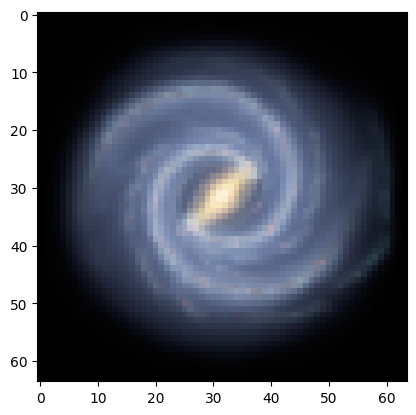

In [ ]:
plt.imshow(milky_way.detach().cpu().numpy())

In [ ]:
# Model

In [ ]:
import fastprogress


def train(dataloader, optimizer, model, loss_fn, device, master_bar,
          transform_common=None, transform_input=None):
    """Run one training epoch.

    Args:
        dataloader (DataLoader): Torch DataLoader object to load data
        optimizer: Torch optimizer object
        model (nn.Module): Torch model to train
        loss_fn: Torch loss function
        device (torch.device): Torch device to use for training
        master_bar (fastprogress.master_bar): Will be iterated over for each
            epoch to draw batches and display training progress
        transform_common (function): Transform to apply to input and target
        transform_input (function): Transform to apply to the input for de-noising.
            By default, no transform is carried out

    Returns:
        float: Mean loss of this epoch
    """
    epoch_loss = []

    for x, _ in fastprogress.progress_bar(dataloader, parent=master_bar):
        optimizer.zero_grad()
        model.train()

        x = transform_common(x) if transform_common else x
        x_inp = transform_input(x) if transform_input else x

        # Forward pass
        x = x.to(device)
        x_inp = x_inp.to(device)
        x_hat, mu, logvar = model(x_inp)

        # Compute loss
        loss = loss_fn(x_hat, x, mu, logvar)

        # Backward pass
        loss.backward()
        optimizer.step()

        # For plotting the train loss, save it for each sample
        epoch_loss.append(loss.item())
        master_bar.child.comment = f"Train Loss: {epoch_loss[-1]:.3f}"

    # Return the mean loss and the accuracy of this epoch
    return np.mean(epoch_loss)


def validate(dataloader, model, loss_fn, device, master_bar,
             transform_common=None, transform_input=None):
    """Compute loss on validation set.

    Args:
        dataloader (DataLoader): Torch DataLoader object to load data
        model (nn.Module): Torch model to train
        loss_fn: Torch loss function
        device (torch.device): Torch device to use for training
        master_bar (fastprogress.master_bar): Will be iterated over to draw
            batches and show validation progress
        transform_common (function): Transform to apply to input and target
        transform_input (function): Transform to apply to the input for de-noising.
            By default, no transform is carried out

    Returns:
        float: Mean loss on validation set
    """
    epoch_loss = []

    model.eval()
    with torch.no_grad():
        for x, _ in fastprogress.progress_bar(dataloader, parent=master_bar):
            x = transform_common(x) if transform_common else x

            x_inp = transform_input(x) if transform_input else x

            # make a prediction on test set
            x = x.to(device)
            x_inp = x_inp.to(device)
            x_hat, mu, logvar = model(x_inp)

            # Compute loss
            loss = loss_fn(x_hat, x, mu, logvar)

            # For plotting the train loss, save it for each sample
            epoch_loss.append(loss.item())
            master_bar.child.comment = f"Valid. Loss: {epoch_loss[-1]:.3f}"

    # Return the mean loss, the accuracy and the confusion matrix
    return np.mean(epoch_loss)




def train_model(model, optimizer, loss_function, device, num_epochs,
                train_dataloader, valid_dataloader,
                transform_common=None, transform_input=None):
    """Run model training.

    Args:
        model (nn.Module): Torch model to train
        optimizer: Torch optimizer object
        loss_fn: Torch loss function for training
        device (torch.device): Torch device to use for training
        num_epochs (int): Max. number of epochs to train
        train_dataloader (DataLoader): Torch DataLoader object to load the
            training data
        valid_dataloader (DataLoader): Torch DataLoader object to load the
            test data
        transform_common (function): Transform to apply to input and target
        transform_input (function): Transform to apply to the input for de-noising.
            By default, no transform is carried out

    Returns:
        list, list: Return list of train losses, test losses.
    """
    master_bar = fastprogress.master_bar(range(num_epochs))
    epoch_list, train_losses, valid_losses = [], [], []

    master_bar.names = ["Train", "Valid."]

    for epoch in master_bar:
        # Train the model
        epoch_train_loss = train(train_dataloader, optimizer, model, loss_function, device, master_bar, transform_common, transform_input)
        # Validate the model
        epoch_valid_loss = validate(valid_dataloader, model, loss_function, device, master_bar, transform_common, transform_input)

        # Save loss and acc for plotting
        epoch_list.append(epoch + 1)
        train_losses.append(epoch_train_loss)
        valid_losses.append(epoch_valid_loss)

        graphs = [[epoch_list, train_losses], [epoch_list, valid_losses]]
        x_bounds = [1, num_epochs]

        master_bar.write(
            f"Epoch {epoch + 1}, "
            f"avg. train loss: {epoch_train_loss:.3f}, "
            f"avg. valid. loss: {epoch_valid_loss:.3f}"
        )
        master_bar.update_graph(graphs, x_bounds)


    return train_losses, valid_losses

In [ ]:
#Autoencoder

In [ ]:
from torch import nn

class Autoencoder(nn.Module):

    def __init__(self, image_size=64, num_channels=1, latent_dims=128, num_filters=64, do_sampling=False):
        super(Autoencoder, self).__init__()

        self.latent_dims  = latent_dims
        self.image_size   = image_size
        self.num_channels = num_channels
        self.num_filters  = num_filters
        self.do_sampling  = do_sampling

        # Encoder
        self.conv_encoder = nn.Sequential(
            # TODO: Build the convolutional layers (torch.nn.Conv2d) here
            nn.Conv2d(in_channels=num_channels, out_channels=self.num_filters, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=self.num_filters, out_channels=self.num_filters, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=self.num_filters, out_channels=self.num_filters, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)),
            nn.ReLU(),
        )

        # Linear Encoder
        # TODO: Match the dimensionality of the first and last layer here!
        self.fc_lin_down = nn.Linear(8*8*self.num_filters, 8 * self.num_filters)
        self.fc_mu       = nn.Linear(8 * self.num_filters, self.latent_dims)
        self.fc_logvar   = nn.Linear(8 * self.num_filters, self.latent_dims)
        self.fc_z        = nn.Linear(self.latent_dims, 8 * self.num_filters)
        self.fc_lin_up   = nn.Linear(8 * self.num_filters, 8*8 * self.num_filters)

        # Decoder
        self.conv_decoder = nn.Sequential(
            # TODO: Implement the reverse of the encoder here using torch.nn.ConvTranspose2d layers
            # The last activation here should be a sigmoid to keep the pixel values clipped in [0, 1)
            nn.ConvTranspose2d(in_channels=self.num_filters, out_channels=self.num_filters, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=self.num_filters, out_channels=self.num_filters, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=self.num_filters, out_channels=num_channels, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)),

            nn.Sigmoid(),
        )

    def encode(self, x):
        ''' Encoder: output is (mean, log(variance))'''
        x       = self.conv_encoder(x)
        # Here, we resize the convolutional output appropriately for a linear layer
        # TODO: Fill in the correct dimensionality for the reordering
        x       = x.view(-1, self.num_filters * 8 * 8)
        x       = self.fc_lin_down(x)
        x       = nn.functional.relu(x)
        mu      = self.fc_mu(x)
        logvar  = self.fc_logvar(x)
        return mu, logvar

    def sample(self, mu, logvar):
        ''' Sample from Gaussian with mean `mu` and SD `sqrt(exp(logvarz))`'''
        # Only use the full mean/stddev procedure if we want to later do sampling
        # And only reparametrise if we are in training mode
        if self.training and self.do_sampling:
            std = torch.exp(logvar * 0.5)
            eps = torch.randn_like(std)
            sample = mu + (eps * std)
            return sample
        else:
            return mu

    def decode(self, z):
        '''Decoder: produces reconstruction from sample of latent z'''
        z = self.fc_z(z)
        z = nn.functional.relu(z)
        z = self.fc_lin_up(z)
        z = nn.functional.relu(z)
        # TODO: Fill in the correct dimensionality for the reordering here again
        z = z.view(-1, self.num_filters, 8, 8)
        z = self.conv_decoder(z)
        return z

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.sample(mu, logvar)
        x_hat = self.decode(z)
        if self.do_sampling:
            return x_hat, mu, logvar
        else:
            return x_hat, None, None

In [ ]:
def autoencoder_loss(recon_x, x, mu=None, logvar=None):
    mse_loss = torch.nn.functional.mse_loss(recon_x, x, reduction='sum') / x.size(dim=0)

    if mu is not None and logvar is not None:
        raise NotImplementedError("Looks like you still need to implement the KL divergence loss!")
    else:
        return mse_loss

In [ ]:
model = Autoencoder()
model = model.to(device)
learning_rate = 2e-4
optimizer = torch.optim.Adam(model.parameters(), learning_rate)

In [ ]:
model

Autoencoder(
  (conv_encoder): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (fc_lin_down): Linear(in_features=4096, out_features=512, bias=True)
  (fc_mu): Linear(in_features=512, out_features=128, bias=True)
  (fc_logvar): Linear(in_features=512, out_features=128, bias=True)
  (fc_z): Linear(in_features=128, out_features=512, bias=True)
  (fc_lin_up): Linear(in_features=512, out_features=4096, bias=True)
  (conv_decoder): Sequential(
    (0): ConvTranspose2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): Sigmoid()
  )
)

In [ ]:
num_epochs = 2

In [ ]:
#data preparation

In [ ]:
type(labels)

numpy.ndarray

In [ ]:
labels = torch.tensor(labels)

In [ ]:
type(labels)

torch.Tensor

In [ ]:
def jax_to_torch(jax_tensor):
    return torch.from_numpy(np.asarray(np.copy(jax_tensor)))

In [ ]:
type(images)

jaxlib.xla_extension.ArrayImpl

In [ ]:
images = jax_to_torch(images)

In [ ]:
type(images)

torch.Tensor

In [ ]:
images= images[:,:,:,:1].permute(0,3,1,2)

In [ ]:
images.shape, labels.shape

(torch.Size([9796, 64, 64, 3]), torch.Size([9796]))

In [ ]:
class Features_Dataset(torch.utils.data.Dataset):
    def __init__(self):
        self._load()

    def _load(self):
        self.images = images
        self.labels = labels

    def __getitem__(self, index):
        return self.images[index], self.labels[index]

    def __len__(self):
        return len(self.labels)

In [ ]:
train_split = 0.6
valid_split = 0.2

full_dataset = Features_Dataset()

test_split = 1 - train_split - valid_split

train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(
        full_dataset, [train_split, valid_split, test_split]
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=128, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
#Begin training

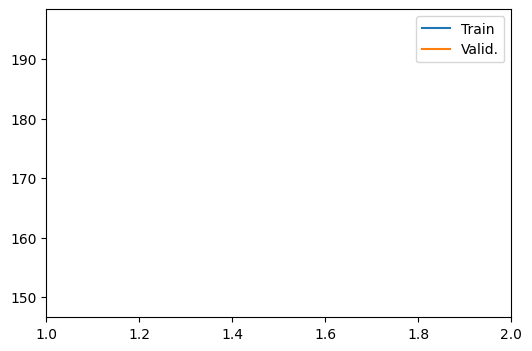

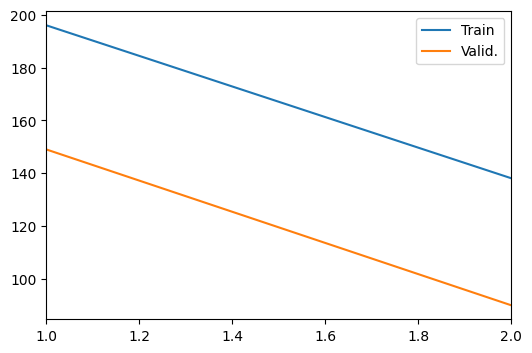

([196.03084497866422, 138.04033611131752],
 [148.96991395950317, 89.88003158569336])

In [ ]:
train_model(model=model, optimizer=optimizer, loss_function=autoencoder_loss, device=device, num_epochs=num_epochs, train_dataloader=train_loader, valid_dataloader=valid_loader)

In [129]:
model.encode(images[2703])

(tensor([[ 0.1957, -0.8275, -0.9594,  0.7981, -0.6298,  2.0145,  1.9121,  4.3576,
           2.9601, -0.3749, -0.8460,  2.0389,  1.6524, -1.0337, -0.2058,  1.9257,
           2.2197,  2.4411,  0.6290,  0.3262,  2.5248,  2.3145, -0.8586, -1.2208,
           1.3342, -2.2397,  4.8325,  1.3299, -2.4164,  0.2218, -0.5813,  1.5873,
          -1.5939, -2.1221,  1.3085,  2.9234, -1.2021,  2.5008,  1.0478, -0.8326,
           0.5193,  3.6844, -3.0097,  1.8011,  0.5372, -1.0508,  0.2316,  4.2804,
           0.4874,  0.1725,  4.4423,  2.3653, -4.1743,  1.8407,  2.3538, -2.8612,
          -1.8264, -3.1187, -2.3737,  1.2869, -0.7069, -2.3988, -3.2529, -1.0505,
          -1.8974, -0.0660,  1.5187,  1.7079, -1.9341,  3.2305,  0.4804, -0.7467,
          -0.2280, -0.8050, -1.4540, -3.3170,  1.2190,  2.8189,  0.7674, -2.6634,
           1.0765,  1.9923,  2.3575,  1.2397,  2.4969,  2.3413,  0.1493, -3.9145,
          -3.7806,  2.4467, -1.9600, -0.0290,  0.2362, -0.0997, -1.6925, -1.1579,
           2.916

In [123]:
images[0].shape

torch.Size([1, 64, 64])

In [127]:
milky_way[:,:,:1].permute(2,0,1).shape

torch.Size([1, 64, 64])

In [128]:
model.encode(milky_way[:,:,:1].permute(2,0,1))

(tensor([[-5.1642e-01,  3.1069e-01, -1.6261e+00, -3.9537e-01,  1.0024e+00,
           2.3677e+00,  5.3714e-02,  2.9484e+00,  1.4695e+00, -2.0830e+00,
          -8.1353e-01,  2.2911e+00, -1.5608e+00, -2.5207e+00,  3.8776e-03,
           2.0671e+00,  1.1353e-01,  1.5487e+00, -4.2151e-01, -8.6673e-02,
           9.1865e-01,  8.5336e-01, -1.0102e+00, -1.0748e+00,  1.9062e-01,
          -1.2316e-01,  2.1228e+00,  7.4277e-01, -2.3615e+00, -8.4320e-01,
           6.2415e-01,  6.1927e-01, -6.8421e-01,  6.4466e-01, -2.8880e+00,
          -6.7689e-01, -1.2533e+00,  2.5154e+00,  3.8298e-01,  1.6182e+00,
          -1.5434e+00,  3.8599e+00, -2.2748e+00, -5.3938e-01,  7.5629e-01,
          -7.7620e-01,  5.2722e-01,  2.4134e+00,  5.4107e-01, -3.7401e-01,
           1.5840e+00,  2.2678e+00, -3.8972e+00,  4.6177e-01,  9.0328e-01,
          -1.2957e+00, -9.0840e-01, -6.8741e-01, -1.5772e+00, -1.3770e-01,
          -1.2603e+00, -8.2994e-01, -2.0899e+00,  8.6376e-01,  8.2777e-01,
           7.0717e-01, -7

# Task: Genereate new images that look like the Milky Way